In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set() # matplot lib defaults
plt.rcParams['figure.figsize'] = (12, 8)
%config InlineBackend.figure_format='retina'

In [4]:
# find the notebook the saved figures came from
fig_prefix='../figures/jq-'

In [5]:
from IPython.display import FileLink
FileLink('./data_cleanup.ipynb')

/Users/jing/Documents/LambdaSchool/lab/notebooks/data_cleanup.ipynb

In [9]:
df = pd.read_sql_table('data', 'sqlite:///../data/mydb.db')  

In [10]:
df.head(3)

,id,market,product,country,date,retail,wholesale,currency,year,month,day
0,0,Bujumbura,Maize,Burundi,2011-10-04,0.0,548798.0,BIF,2011.0,10.0,4.0
1,1,Bujumbura,Maize,Burundi,2011-10-05,0.0,549000.0,BIF,2011.0,10.0,5.0
2,2,Bujumbura,Maize,Burundi,2011-10-06,0.0,498970.0,BIF,2011.0,10.0,6.0


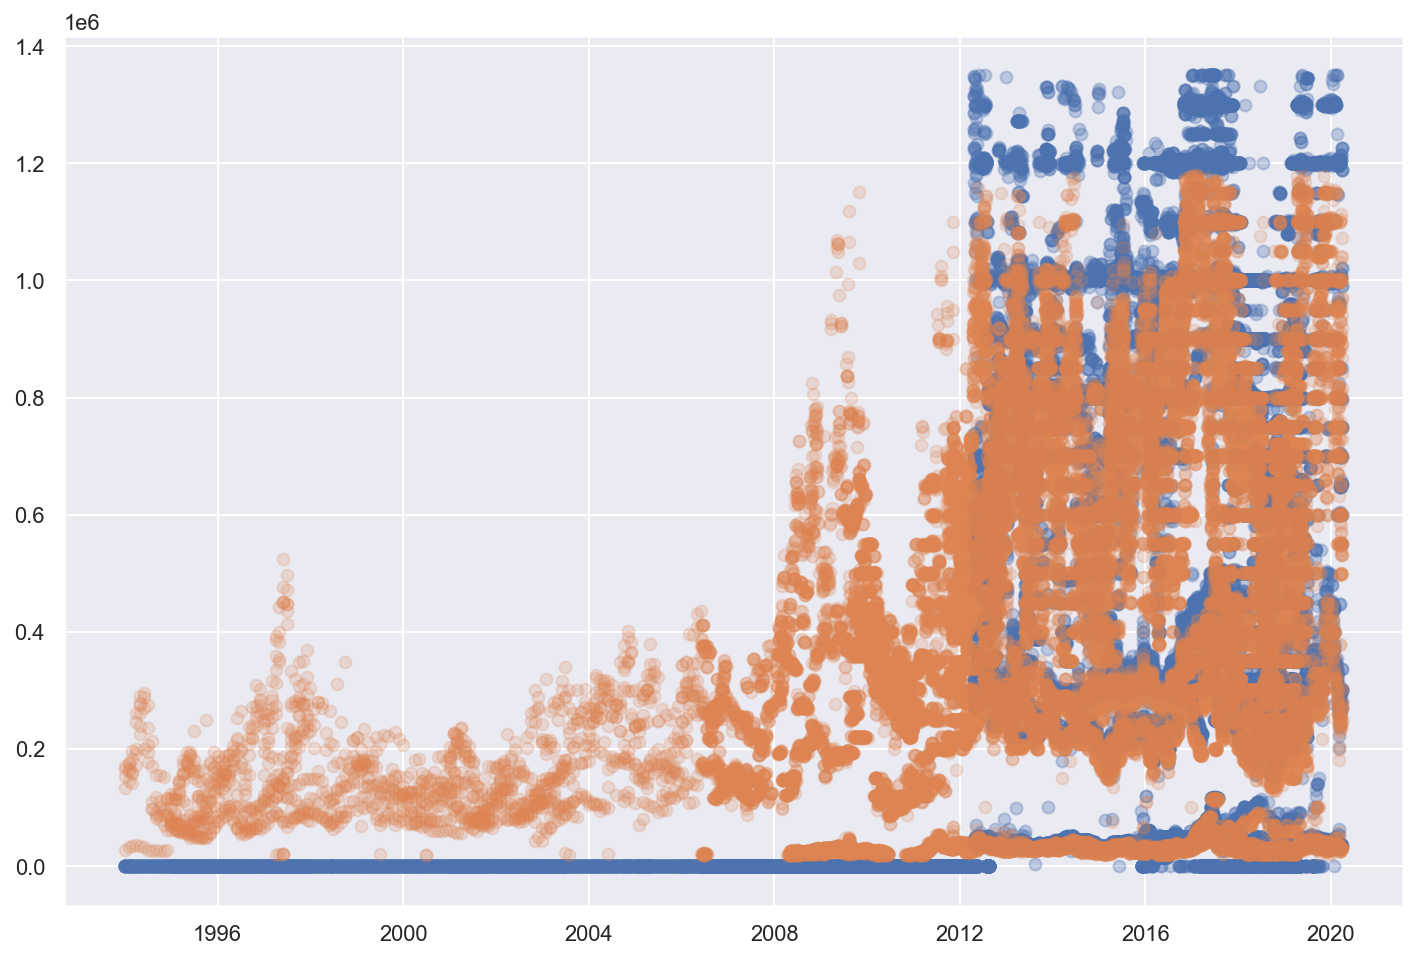

In [11]:
fig = plt.figure()
ax = fig.gca()
ax.scatter(df['date'], df['retail'], alpha=0.3)
ax.scatter(df['date'], df['wholesale'], alpha=0.2)
#ax.set_yscale('log')
plt.show()

In [12]:
condition = (df['date']>'2012-01-01' ) & ( df['product']=='Maize')
df = df[condition]
df.head()

,id,market,product,country,date,retail,wholesale,currency,year,month,day
54,54,Bujumbura,Maize,Burundi,2012-01-02,0.0,599770.0,BIF,2012.0,1.0,2.0
55,55,Bujumbura,Maize,Burundi,2012-01-03,0.0,606940.0,BIF,2012.0,1.0,3.0
56,56,Bujumbura,Maize,Burundi,2012-01-04,0.0,595704.0,BIF,2012.0,1.0,4.0
57,57,Bujumbura,Maize,Burundi,2012-01-05,0.0,590935.0,BIF,2012.0,1.0,5.0
58,58,Bujumbura,Maize,Burundi,2012-01-06,0.0,593474.0,BIF,2012.0,1.0,6.0


In [13]:
df['currency'].unique()

array(['BIF', 'CDF', 'KES', 'RWF', 'SSD', 'TZS', 'UGX'], dtype=object)

In [14]:
markets = sorted(df['market'].unique())
colors = sns.color_palette(n_colors = len(markets))
color_dict = {key:value for key, value in zip(markets, colors)}
#color_dict

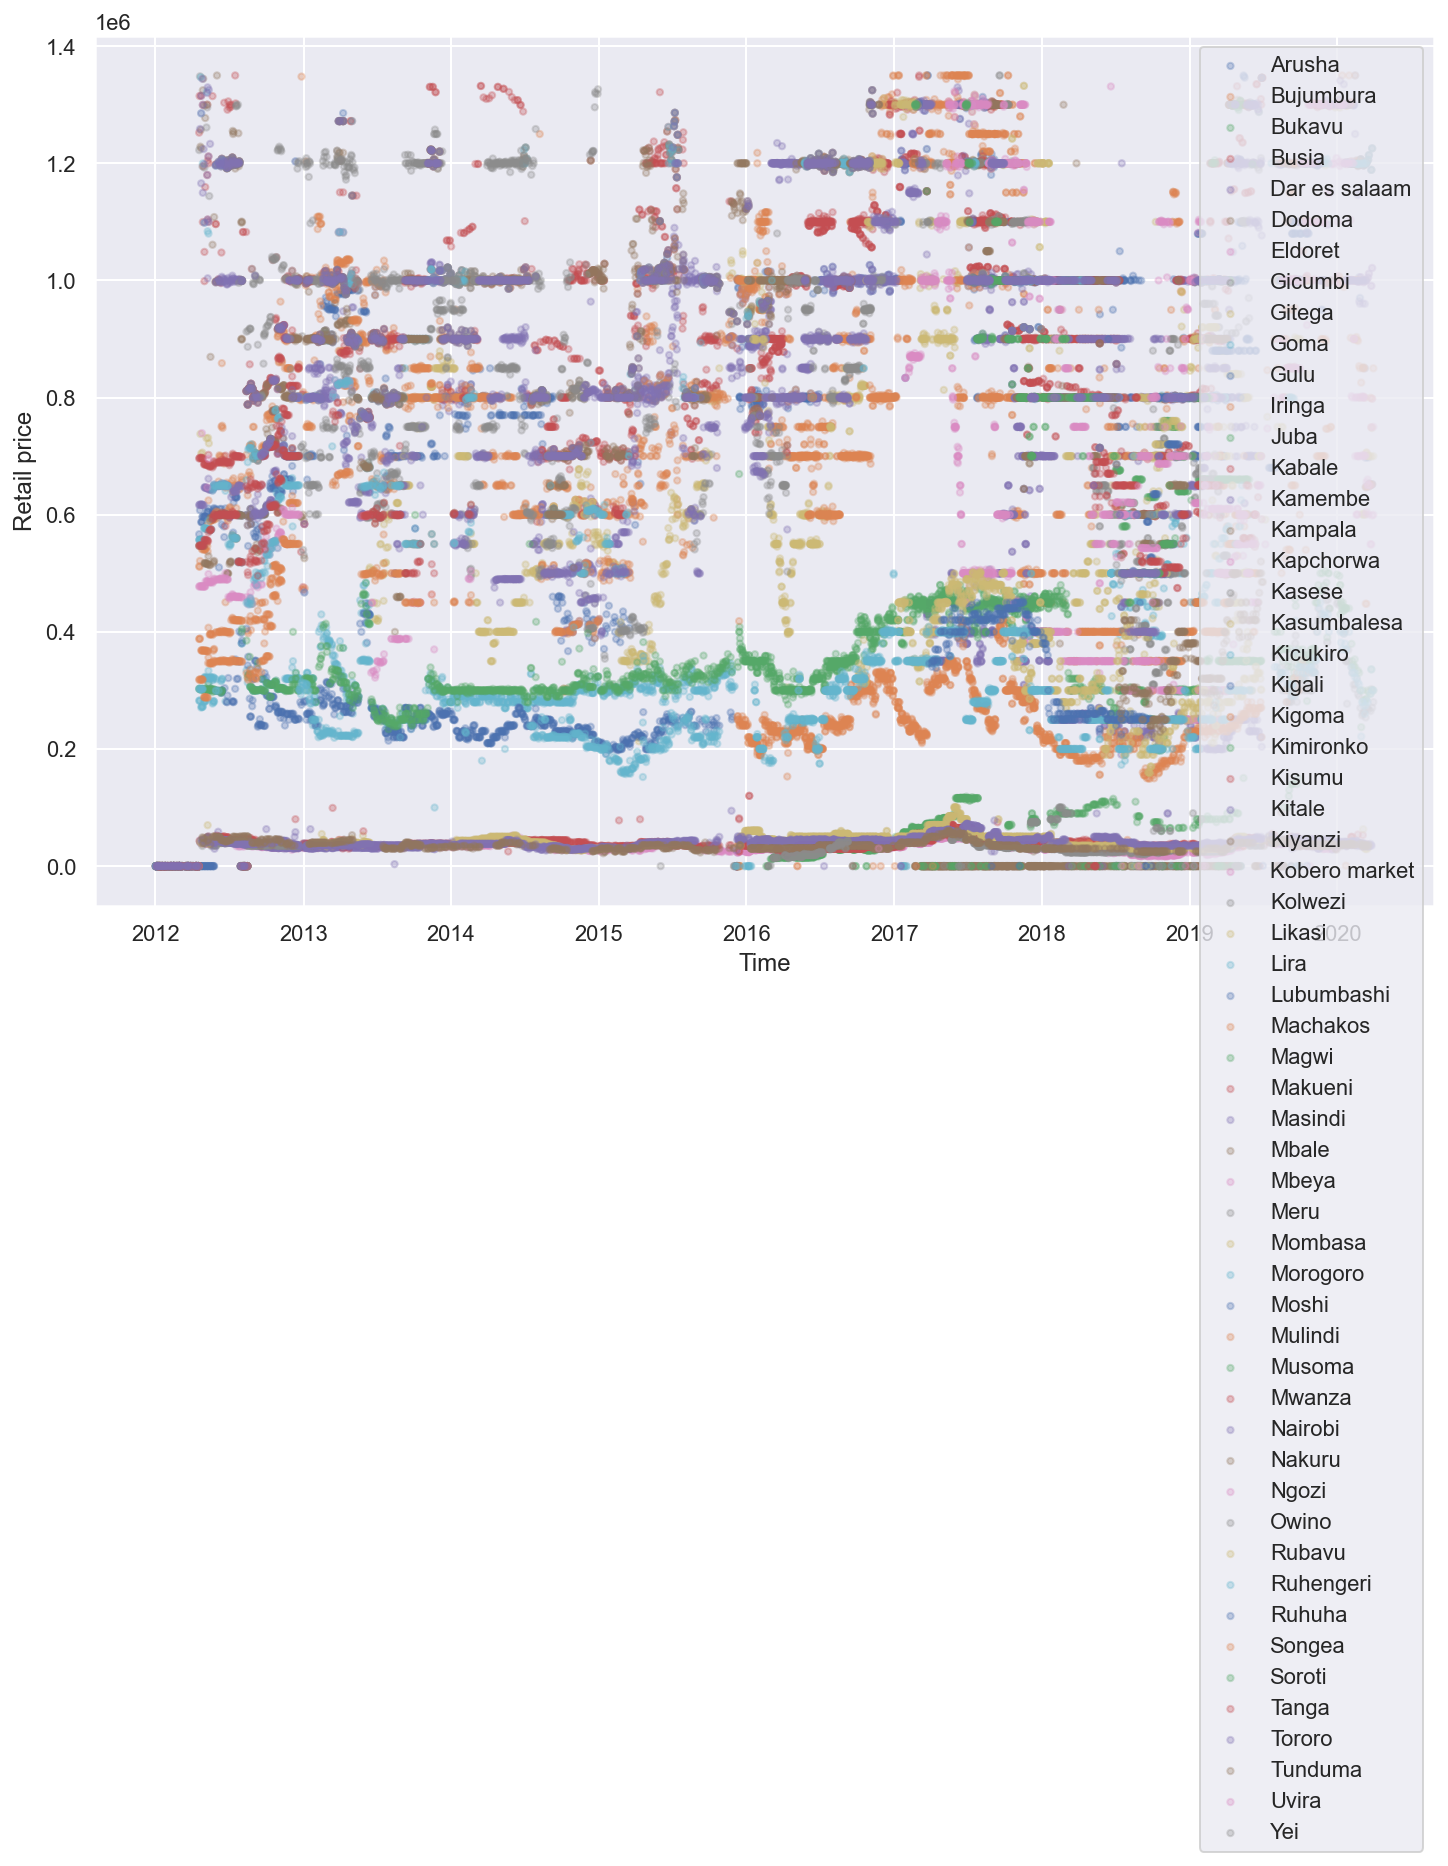

In [15]:
fig = plt.figure()
ax = fig.gca()
for market in markets:
    #print(market)
    color =color_dict[market]
    color_repeated =np.tile(np.array(color), (df[df['market'] == market].shape[0],1))
    
    ax.scatter(df[df['market'] == market]['date'],
               df[df['market'] == market]['retail'],  
               c = color_repeated, 
               s=10,
               label = market,
               alpha=0.3)
plt.xlabel('Time')
plt.ylabel('Retail price')
plt.legend()
plt.show()

visualization reveals different trends for different market, let's narrow down

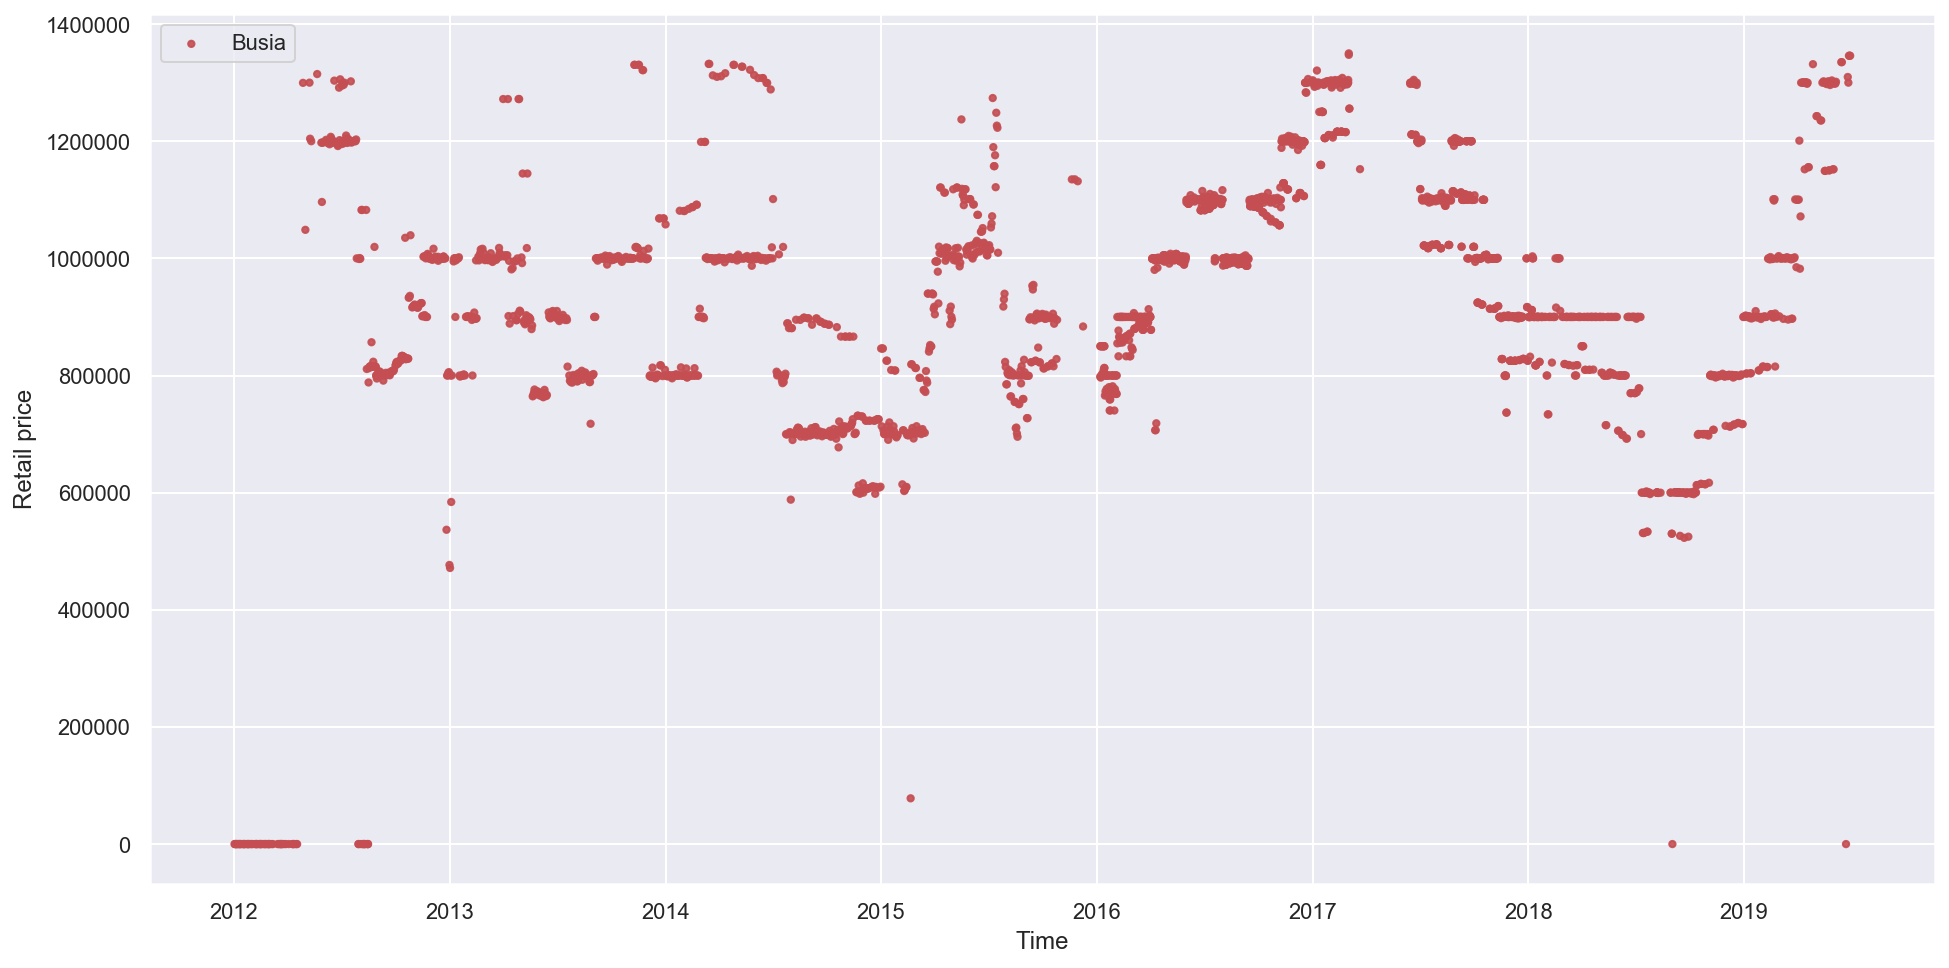

In [34]:
market = 'Busia'#'Gitega'#, 'Bujumbura', 'Arusha']#,'Busia',  'Dar es salaam', 'Iringa']
color =color_dict[market]
color_repeated =np.tile(np.array(color), (df[df['market'] == market].shape[0],1))
#print(color_repeated)

fig = plt.figure()
ax = fig.gca()
ax.scatter(df[df['market'] == market]['date'],
           df[df['market'] == market]['retail'],
           c = color_repeated, 
           s=10, 
           label=market,
           alpha=0.9)
plt.xlabel('Time')
plt.ylabel('Retail price')
plt.legend()
plt.show()

In [16]:
# define alert price: 
def price_alert(df_series, alert_levels=[-3, 3]):
    '''x: df series
    alert_level: set how many stds away from the mean
    return number of standard deviation within which the value is from mean'''
    x = df_series.to_numpy()
    
    alerts = np.zeros(np.array(alert_level).shape)
    #n_stds = np.ceil((x-np.nanmean(x))/np.nanstd(x))
    
    alerts = np.nanmean(x)+ alert_level * np.nanstd(x)
    
    return alerts

In [17]:
subset = df[df['market']=='Gitega']

alert_levels=[-3, -2, -1, 0, 1, 2, 3]
alert_cols = ['alert'+str(alert_level) for alert_level in alert_levels ]
alert_cols

['alert-3', 'alert-2', 'alert-1', 'alert0', 'alert1', 'alert2', 'alert3']

In [19]:
subset.currency.unique() 
# doublecheck make sure one market has one currency only

array(['BIF'], dtype=object)

In [24]:
for alert_level in alert_levels:
    alert_col = 'retail_alert'+str(alert_level)
    subset[alert_col] = price_alert(subset['retail'], alert_level)

<ipython-input-24-7798b2994671>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset[alert_col] = price_alert(subset['retail'], alert_level)


In [25]:
subset.head()

,id,market,product,country,date,retail,wholesale,currency,year,month,day,retail_alert-3,retail_alert-2,retail_alert-1,retail_alert0,retail_alert1,retail_alert2,retail_alert3
2057,2057,Gitega,Maize,Burundi,2012-04-21,737930.0,553448.0,BIF,2012.0,4.0,21.0,-47048.351926,230611.419091,508271.190108,785930.961125,1.063591e+06,1.341251e+06,1.618910e+06
2058,2058,Gitega,Maize,Burundi,2012-04-23,704388.0,503134.0,BIF,2012.0,4.0,23.0,-47048.351926,230611.419091,508271.190108,785930.961125,1.063591e+06,1.341251e+06,1.618910e+06
2059,2059,Gitega,Maize,Burundi,2012-04-26,706114.0,509059.0,BIF,2012.0,4.0,26.0,-47048.351926,230611.419091,508271.190108,785930.961125,1.063591e+06,1.341251e+06,1.618910e+06
2060,2060,Gitega,Maize,Burundi,2012-05-06,730572.0,481514.0,BIF,2012.0,5.0,6.0,-47048.351926,230611.419091,508271.190108,785930.961125,1.063591e+06,1.341251e+06,1.618910e+06
2061,2061,Gitega,Maize,Burundi,2012-05-10,731192.0,438716.0,BIF,2012.0,5.0,10.0,-47048.351926,230611.419091,508271.190108,785930.961125,1.063591e+06,1.341251e+06,1.618910e+06


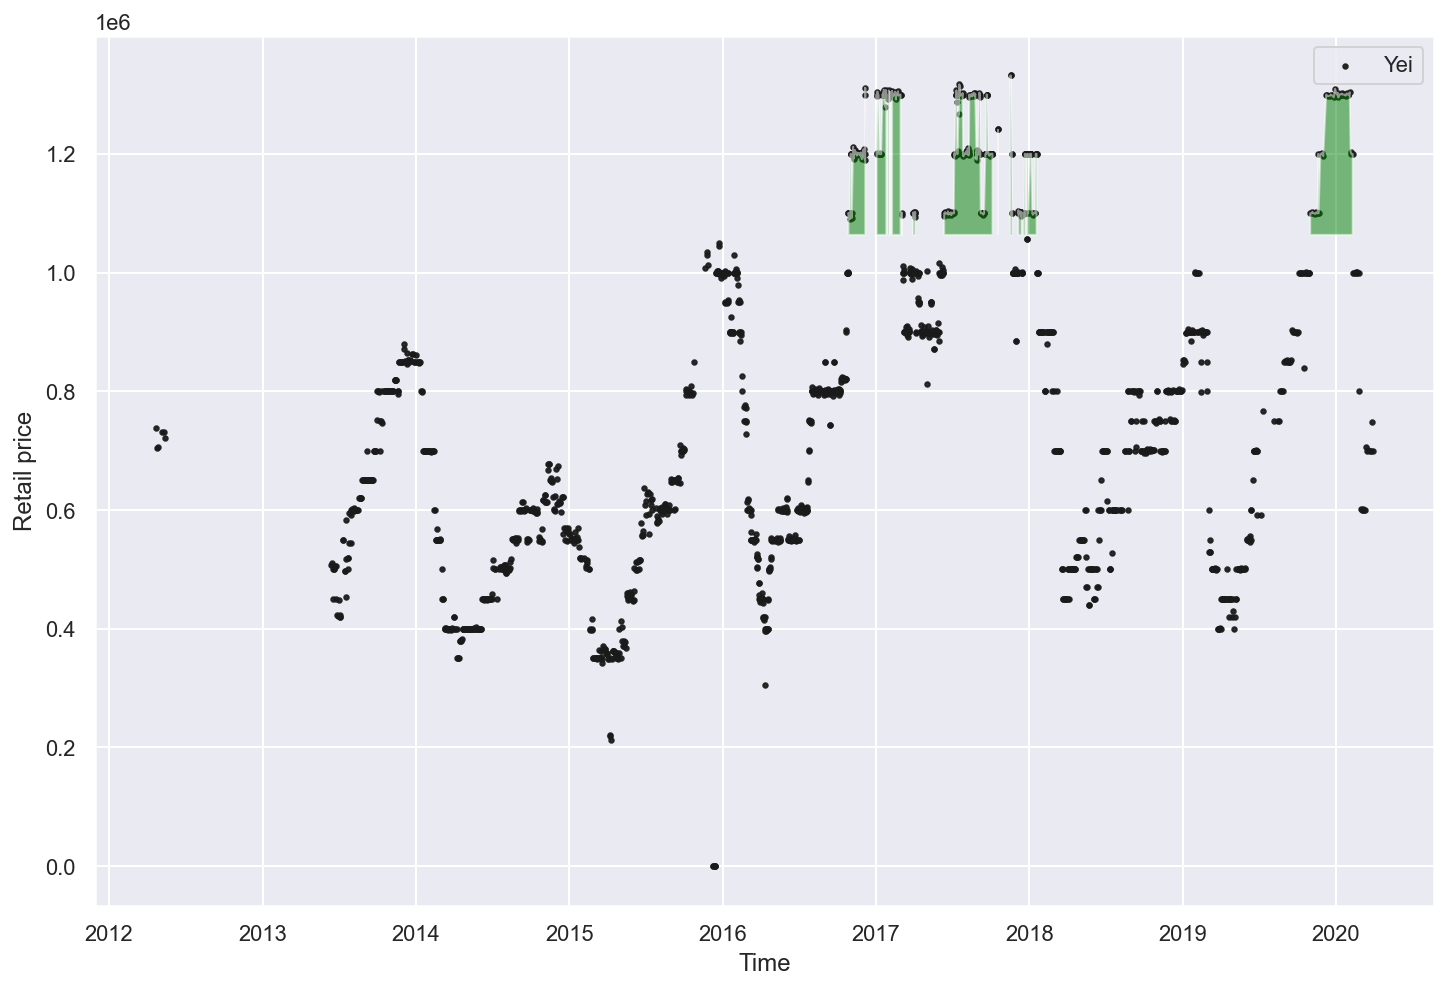

In [26]:
fig = plt.figure()
ax = fig.gca()
x = subset['date']
y = subset['retail']

y1 = subset['retail_alert1']
y2 = subset['retail_alert2']

ax.scatter(x, y, c='k', s=5, label=market, alpha=0.9)

ax.fill_between(x, y, y1, where=y > y2, facecolor='orange', alpha=0.5)
ax.fill_between(x, y, y1, where=(y > y1) & (y < y2), facecolor='green', alpha=0.5)


# colors = ['red', 'orange', 'yellow', 'blue', 'yellow', 'orange', 'red']
# color_dict = {key:value for key, value in zip(alert_levels, colors)}
                                
# for alert_level in alert_levels:
#     ax.hlines(price_alert(subset['retail'], alert_level), '2012-01-01', '2020-05-05', 
#               colors=color_dict[alert_level], linestyles='dashed',linewidth=4)
                               
plt.xlabel('Time')
plt.ylabel('Retail price')
plt.legend()
plt.show()

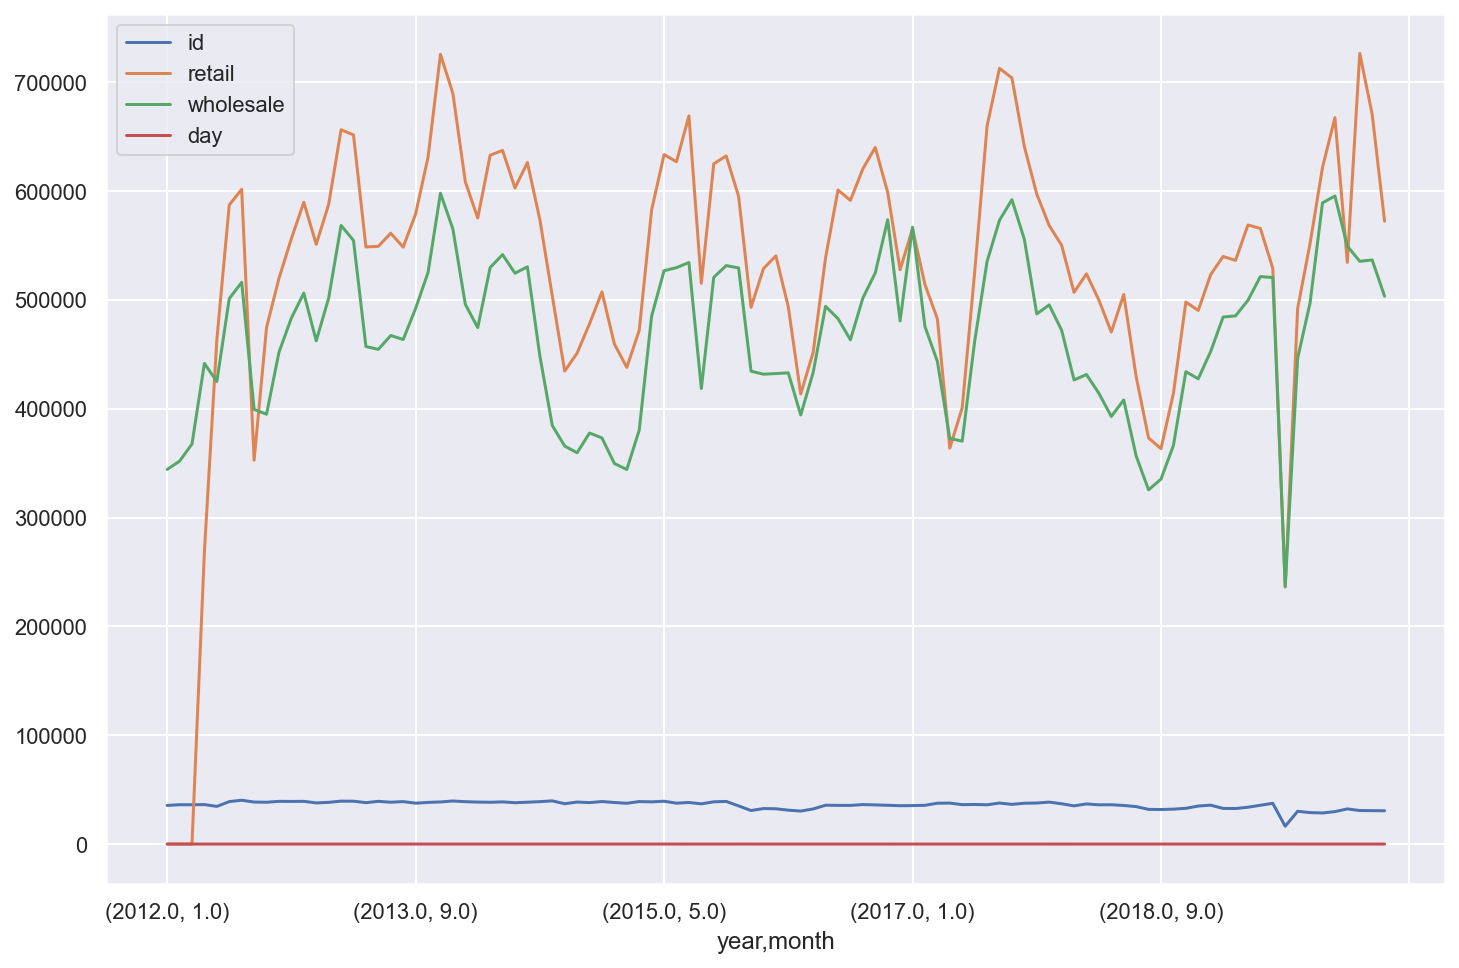

In [27]:
# maize price average over all markets 
df.sort_values('date').groupby(['year','month']).mean().plot()
plt.show()

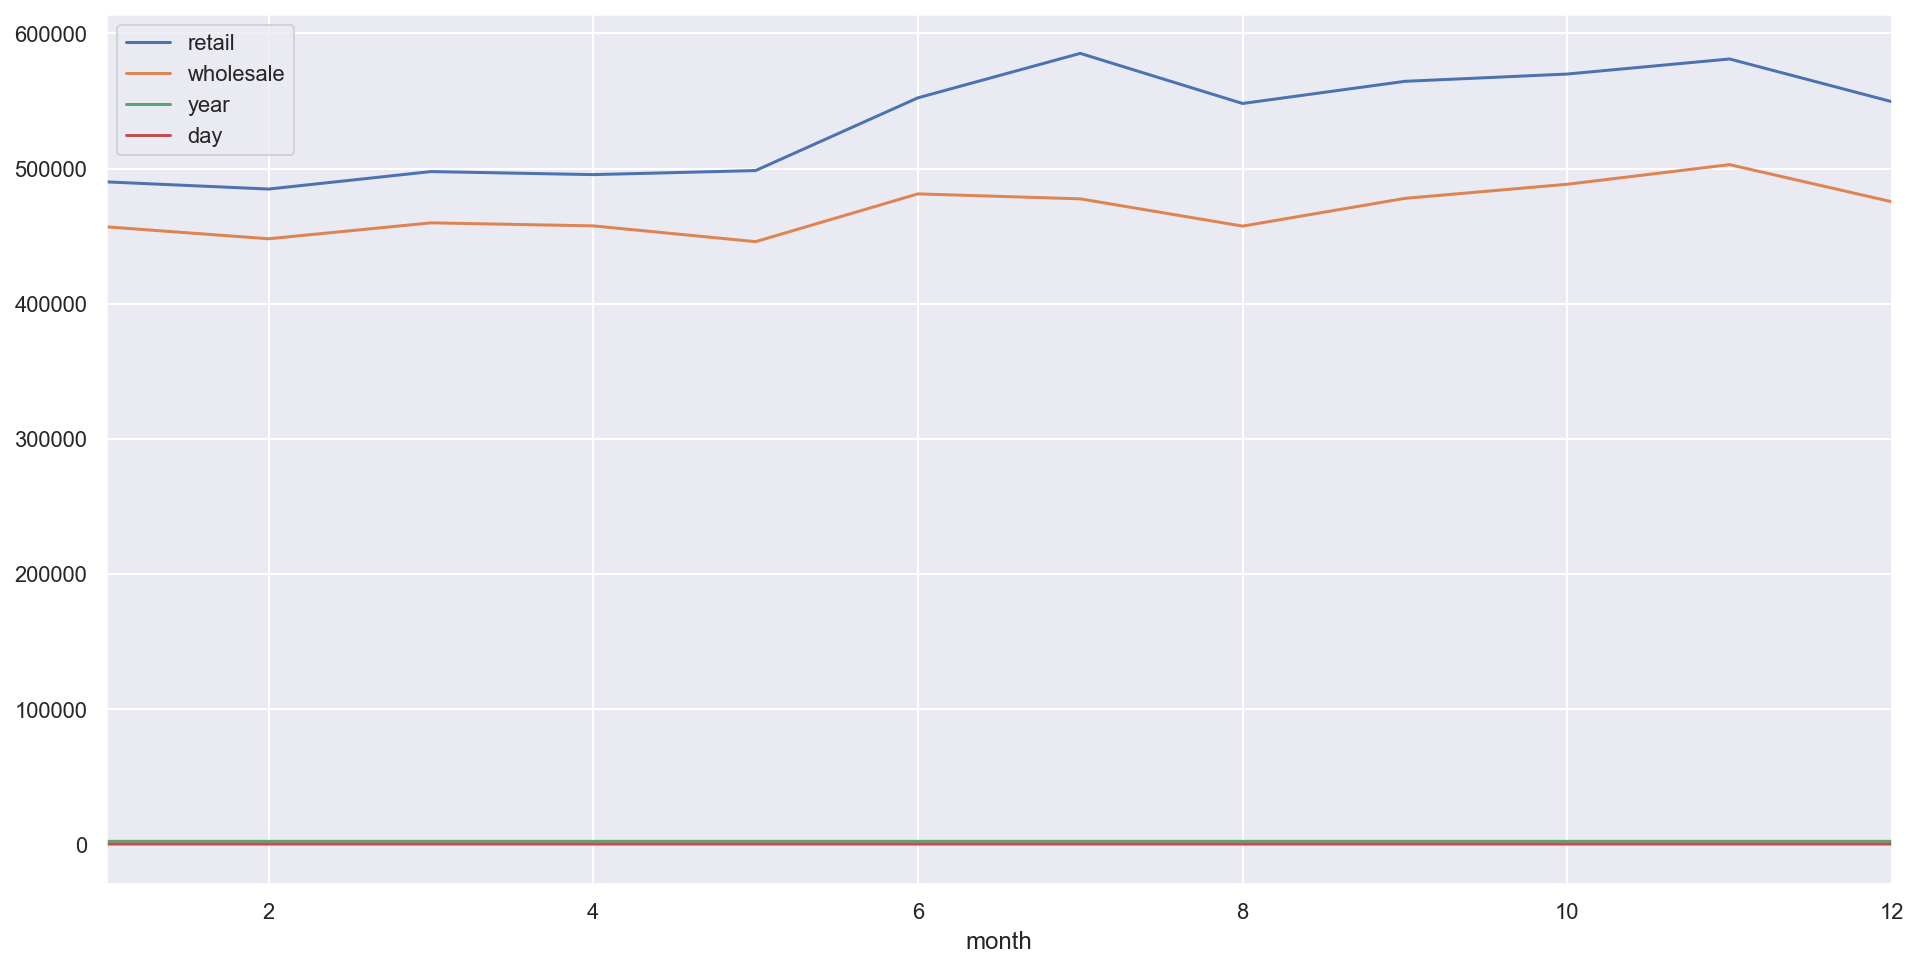

In [33]:
df.sort_values('date').groupby(['month']).mean().plot()